In [1]:
#import packages 
import xarray as xr
from pyhdf.SD import SD, SDC
import os, datetime, time
import numpy as np
from zipfile import ZipFile

In [2]:
#Define a function to read the HDF file
def read_trmm_HDF(fid):
    base_file = SD(fid, SDC.READ)
    data = base_file.select('precipitation').get()
    #data[data < 0.01] = np.nan
    return data

In [10]:
base = 'Monthly_TRMM_2000/'
month = base + '3B42_2000_01.zip'
datalist = []
dates = []
with ZipFile(month,'r') as z:
    nl = z.namelist()
    #print(nl)
    for n in nl:
        z.extract(n,base)
        
        #Here you can then read one file in and store the data
        data = read_trmm_HDF(base + n)
        ds = xr.DataArray(data)
        datalist.append(ds)
        
        #Add the date to the list
        date, hr = n.split('.')[1:3]
        print(date,hr)
        t = datetime.datetime(int(date[:4]),int(date[4:6]), int(date[6:]),int(hr))
        dates.append(t)
        
        #Delete the extracted dataset
        os.remove(base + n)
        if hr =='00':
            print(n)
            
print(len(datalist))
        

20000101 00
3B42.20000101.00.7.HDF
20000101 03
20000101 06
20000101 09
20000101 12
20000101 15
20000101 18
20000101 21
20000102 00
3B42.20000102.00.7.HDF
20000102 03
20000102 06
20000102 09
20000102 12
20000102 15
20000102 18
20000102 21
20000103 00
3B42.20000103.00.7.HDF
20000103 03
20000103 06
20000103 09
20000103 12
20000103 15
20000103 18
20000103 21
20000104 00
3B42.20000104.00.7.HDF
20000104 03
20000104 06
20000104 09
20000104 12
20000104 15
20000104 18
20000104 21
20000105 00
3B42.20000105.00.7.HDF
20000105 03
20000105 06
20000105 09
20000105 12
20000105 15
20000105 18
20000105 21
20000106 00
3B42.20000106.00.7.HDF
20000106 03
20000106 06
20000106 09
20000106 12
20000106 15
20000106 18
20000106 21
20000107 00
3B42.20000107.00.7.HDF
20000107 03
20000107 06
20000107 09
20000107 12
20000107 15
20000107 18
20000107 21
20000108 00
3B42.20000108.00.7.HDF
20000108 03
20000108 06
20000108 09
20000108 12
20000108 15
20000108 18
20000108 21
20000109 00
3B42.20000109.00.7.HDF
20000109 03
2

In [11]:
base = 'Monthly_TRMM_2000/'
os.listdir(base)

['3B42_2000_03.zip',
 '3B42_2000_08.zip',
 '3B42_2000_10.zip',
 '3B42_2000_12.zip',
 '3B42_2000_06.zip',
 '3B42_2000_05.zip',
 '3B42_2000_02.zip',
 '3B42_2000_07.zip',
 '3B42_2000_11.zip',
 '3B42_2000_01.zip',
 '3B42_2000_04.zip',
 '3B42_2000_09.zip',
 '.ipynb_checkpoints']

In [12]:
print(datalist)

[<xarray.DataArray (dim_0: 1440, dim_1: 400)>
array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.03, 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)
Dimensions without coordinates: dim_0, dim_1, <xarray.DataArray (dim_0: 1440, dim_1: 400)>
array([[0.        , 0.        , 0.        , ..., 0.05      , 0.06      ,
        0.06      ],
       [0.        , 0.        , 0.        , ..., 0.08      , 0.08      ,
        0.06      ],
       [0.        , 0.        , 0.        , ..., 0.12      , 0.19999999,
        0.32999998],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.01      ,
        0.03      ],
       [0.        , 0.        , 0.        , ..., 0.06

In [13]:
#Concatenate Dataset
ds = xr.concat(datalist,'time')
print(ds)

<xarray.DataArray (time: 248, dim_0: 1440, dim_1: 400)>
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.03      ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.05      ,
         0.06      , 0.06      ],
        [0.        , 0.        , 0.        , ..., 0.08      ,
         0.08      , 0.06      ],
        [0.        , 0.        , 0.        , ..., 0.12      ,
         0.19999999, 0.32999998],
...
        [0.        , 0.        , 0.        , ..., 0.        ,

In [14]:
#rename dimensions
ds = ds.rename({'dim_0':'Lon','dim_1':'Lat'})

ul_x, ul_y, res = -180, 50, 0.25
gt = np.array([ul_x, res, 0, ul_y,0, res*-1])
cs = 'epsg:4326'

attrs = {'gt': gt, 'cs': cs}
ds = ds.assign_attrs(attrs)

In [15]:
xvals = np.arange(ul_x + res/ 2., ul_x + res*ds.Lon.shape[0],res)
yvals = np.arange(ul_y - res*ds.Lat.shape[0] + res / 2., ul_y, res)
#print(yvals)
ds = ds.assign_coords(Lon=xvals)
ds = ds.assign_coords(Lat=yvals)
ds = ds.assign_coords(time=dates)

#print(ds)
ds_save = xr.Dataset({'precip':ds})
print(ds_save)

<xarray.Dataset>
Dimensions:  (Lat: 400, Lon: 1440, time: 248)
Coordinates:
  * Lon      (Lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * Lat      (Lat) float64 -49.88 -49.62 -49.38 -49.12 ... 49.38 49.62 49.88
  * time     (time) datetime64[ns] 2000-01-01 ... 2000-01-31T21:00:00
Data variables:
    precip   (time, Lon, Lat) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0


In [16]:
ds_save.to_netcdf(base + 'Jan_2000.nc')

In [17]:
os.listdir(base)

['3B42_2000_03.zip',
 'Jan_2000.nc',
 '3B42_2000_08.zip',
 '3B42_2000_10.zip',
 '3B42_2000_12.zip',
 '3B42_2000_06.zip',
 '3B42_2000_05.zip',
 '3B42_2000_02.zip',
 '3B42_2000_07.zip',
 '3B42_2000_11.zip',
 '3B42_2000_01.zip',
 '3B42_2000_04.zip',
 '3B42_2000_09.zip',
 '.ipynb_checkpoints']

In [18]:
def create_month(month, out_fid):
    print('starting:', month)
    ts = time.time()
    if not os.path.exists(out_fid):
        datalist = []
        dates = []
        with ZipFile(month, 'r') as z:
            nl = z.namelist()
            for n in nl:
                z.extract(n,base)

                #Here you can then read one file in and store the data
                data = read_trmm_HDF(base + n)
                ds = xr.DataArray(data)
                datalist.append(ds)

                #Add the date to the list
                date, hr = n.split('.')[1:3]
                #print(date,hr)
                t = datetime.datetime(int(date[:4]),int(date[4:6]), int(date[6:]),int(hr))
                dates.append(t)

                #Delete the extracted dataset
                os.remove(base + n)
            
                    
        #concatenate Dataset
        ds = xr.concat(datalist, 'time')

        #rename dimensions
        ds = ds.rename({'dim_0':'Lon','dim_1':'Lat'})

        ul_x, ul_y, res = -180, 50, 0.25
        gt = np.array([ul_x, res, 0, ul_y,0, res*-1])
        cs = 'epsg:4326'

        attrs = {'gt': gt, 'cs': cs}
        ds = ds.assign_attrs(attrs)

        xvals = np.arange(ul_x + res/ 2., ul_x + res*ds.Lon.shape[0],res)
        yvals = np.arange(ul_y - res*ds.Lat.shape[0] + res / 2., ul_y, res)
        #print(yvals)
        ds = ds.assign_coords(Lon=xvals)
        ds = ds.assign_coords(Lat=yvals)
        ds = ds.assign_coords(time=dates)

        #print(ds)
        ds_save = xr.Dataset({'precip':ds})
        ds_save.to_netcdf(out_fid)
    print('Done:', month, time.time() - ts)


In [19]:
ts = time.time()
for i in range(1, 13):
    month = base + '3B42_2000_' + str(i). zfill(2) + '.zip'
    create_month(month, base + '2000_' + str(i).zfill(2) + '.nc')
print('Total Time to Extract Data, Save Output, and Clean up Temporary files:',time.time()-ts)

starting: Monthly_TRMM_2000/3B42_2000_01.zip
Done: Monthly_TRMM_2000/3B42_2000_01.zip 7.388350963592529
starting: Monthly_TRMM_2000/3B42_2000_02.zip
Done: Monthly_TRMM_2000/3B42_2000_02.zip 7.604502201080322
starting: Monthly_TRMM_2000/3B42_2000_03.zip
Done: Monthly_TRMM_2000/3B42_2000_03.zip 7.494607448577881
starting: Monthly_TRMM_2000/3B42_2000_04.zip
Done: Monthly_TRMM_2000/3B42_2000_04.zip 7.325040817260742
starting: Monthly_TRMM_2000/3B42_2000_05.zip
Done: Monthly_TRMM_2000/3B42_2000_05.zip 7.451516389846802
starting: Monthly_TRMM_2000/3B42_2000_06.zip
Done: Monthly_TRMM_2000/3B42_2000_06.zip 23.16829824447632
starting: Monthly_TRMM_2000/3B42_2000_07.zip
Done: Monthly_TRMM_2000/3B42_2000_07.zip 7.665987730026245
starting: Monthly_TRMM_2000/3B42_2000_08.zip
Done: Monthly_TRMM_2000/3B42_2000_08.zip 7.395046710968018
starting: Monthly_TRMM_2000/3B42_2000_09.zip
Done: Monthly_TRMM_2000/3B42_2000_09.zip 7.162593603134155
starting: Monthly_TRMM_2000/3B42_2000_10.zip
Done: Monthly_TRMM_

In [20]:
#Finally stack them all together 
full = xr.open_mfdataset(base + '*.nc', combine = 'by_coords')
print(full)

<xarray.Dataset>
Dimensions:  (Lat: 400, Lon: 1440, time: 2928)
Coordinates:
  * Lon      (Lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * Lat      (Lat) float64 -49.88 -49.62 -49.38 -49.12 ... 49.38 49.62 49.88
  * time     (time) datetime64[ns] 2000-01-01 ... 2000-12-31T21:00:00
Data variables:
    precip   (time, Lon, Lat) float32 dask.array<chunksize=(248, 1440, 400), meta=np.ndarray>


In [21]:
months = full.time.dt.month.values
print(months, months.shape)

#set NoData for whole array
full = full.where(full.precip > 0.01)

[ 1  1  1 ... 12 12 12] (2928,)


/opt/miniconda/envs/BigData/lib/python3.7/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/miniconda/envs/BigData/lib/python3.7/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/miniconda/envs/BigData/lib/python3.7/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/miniconda/envs/BigData/lib/python3.7/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


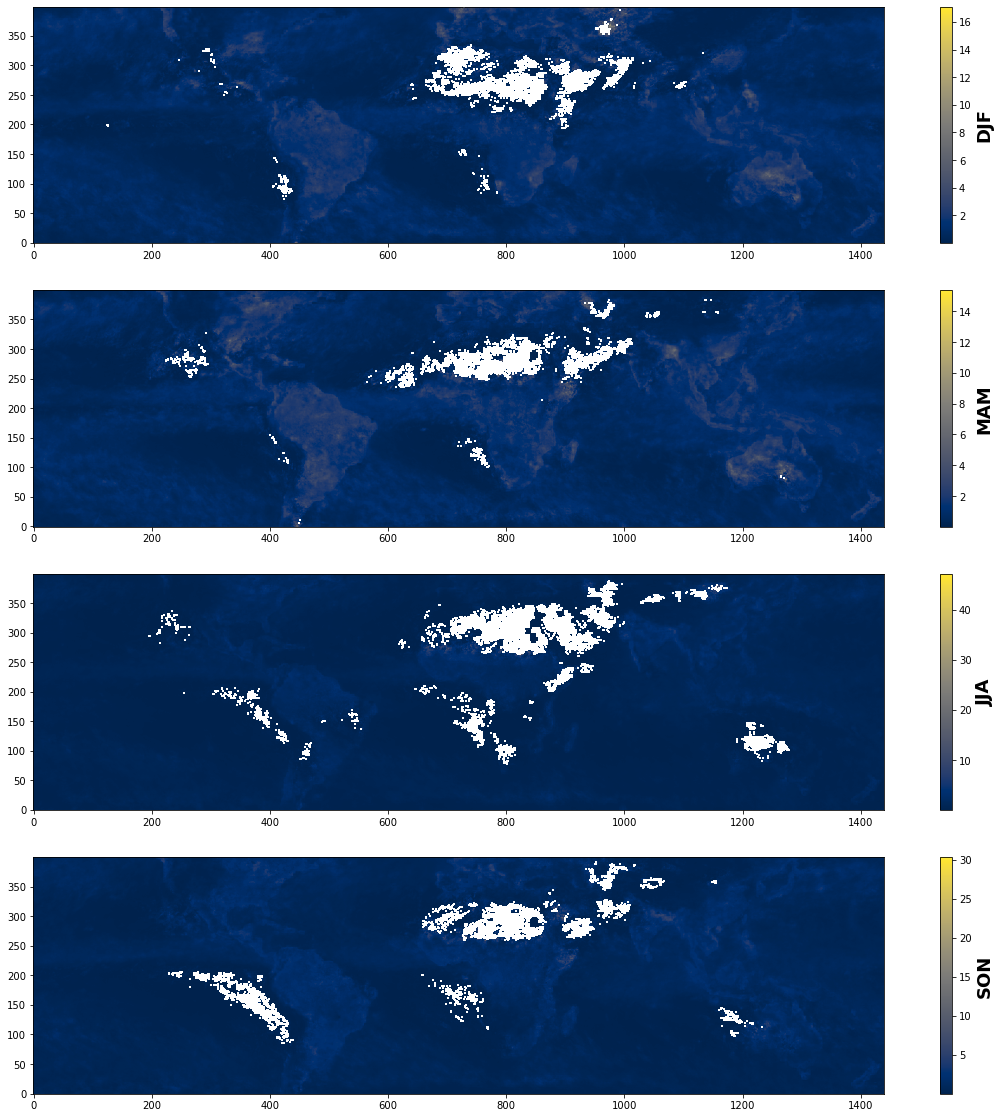

In [23]:
import matplotlib.pyplot as plt
f, (ax,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(20,20))

idx = np.where(np.logical_or(months ==12, np.logical_or(months==1, months ==2)))
sub = full.precip[idx]
mn = sub.mean(dim='time')
a = ax.imshow(mn.T,origin='lower', cmap=plt.cm.cividis)
cb=plt.colorbar(a, ax=ax)
cb.set_label('DJF',fontsize=18,fontweight='bold')

idx = np.where(np.logical_or(months ==3, np.logical_or(months==4, months ==5)))
sub = full.precip[idx]
mn = sub.mean(dim='time')
a = ax2.imshow(mn.T,origin='lower', cmap=plt.cm.cividis)
cb=plt.colorbar(a, ax=ax2)
cb.set_label('MAM',fontsize=18,fontweight='bold')

idx = np.where(np.logical_or(months ==6, np.logical_or(months==7, months ==8)))
sub = full.precip[idx]
mn = sub.mean(dim='time')
a = ax3.imshow(mn.T,origin='lower', cmap=plt.cm.cividis)
cb=plt.colorbar(a, ax=ax3)
cb.set_label('JJA',fontsize=18,fontweight='bold')

idx = np.where(np.logical_or(months ==9, np.logical_or(months==10, months ==11)))
sub = full.precip[idx]
mn = sub.mean(dim='time')
a = ax4.imshow(mn.T,origin='lower', cmap=plt.cm.cividis)
cb=plt.colorbar(a, ax=ax4)
cb.set_label('SON',fontsize=18,fontweight='bold')
plt.savefig('TRMM_Seasonal.png', dpi=300)
